In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
acs = pd.read_csv('ACS16_NYC.csv')

In [4]:
acs.shape

(1838, 8)

In [5]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income,percent_bachelorsdegree
0,1,Bronx_1,7503.0,32.1,303.0,0.7,10778.0,0.231023
1,2,Bronx_2,5251.0,38.6,449.0,11.8,30760.0,2.628062
2,3,Bronx_4,5980.0,39.4,300.0,14.3,32371.0,4.766667
3,4,Bronx_16,6056.0,36.9,325.0,5.8,17848.0,1.784615
4,5,Bronx_19,2682.0,32.5,227.0,13.7,21788.0,6.035242


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [7]:
X = acs[['median_age', 'median_income', 'percent_bachelorsdegree', 'total_population']]

## Standard Scale

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## Cluster Analysis (K-Means)

### Find value of K

At 2 clusters, inertia is 5158.868713345617
At 3 clusters, inertia is 4309.288306654742
At 4 clusters, inertia is 3691.817835762331
At 5 clusters, inertia is 3324.4052519671477
At 6 clusters, inertia is 2984.1137054074097
At 7 clusters, inertia is 2708.7732423468656
At 8 clusters, inertia is 2497.643896547185
At 9 clusters, inertia is 2350.8828292943326


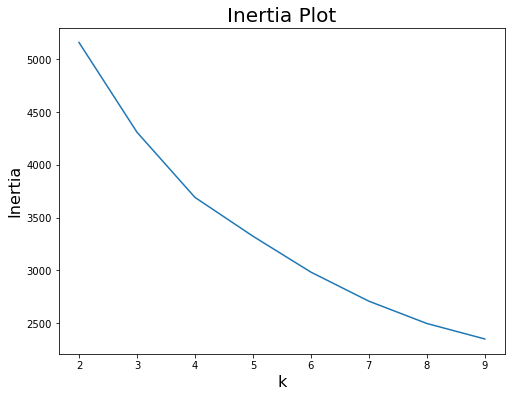

In [9]:
np.random.seed(42)
s = np.zeros(8)
for k in range(0, 8):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(X_std)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Inertia Plot', fontsize = 20)

## K=4 is optimal
K=4 is at the elbow of the score graph

In [13]:
cluster = KMeans(n_clusters = 4, n_init=100)
cluster.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
acs['clusterLabels'] = cluster.labels_

In [15]:
acs.clusterLabels.value_counts()

2    675
0    556
1    372
3    235
Name: clusterLabels, dtype: int64

## Investigate clusters' statistics

In [16]:
for i in range(0,4):
    group = acs[acs['clusterLabels'] == i]
    print('Group ' + str(i) + ':')
    print('    Group Size: ' + str(len(group)))
    print('    Population: ' + str(round(group.total_population.mean(),2)))
    print('    Median Age: ' + str(round(group.median_age.mean(),2)))
    print('    Median Income: ' + str(round(group.median_income.mean(),2)))
    print('    Percent with Bachelors Degree: ' + str(round(group.percent_bachelorsdegree.mean(),2)))

Group 0:
    Group Size: 556
    Population: 3046.78
    Median Age: 42.69
    Median Income: 32377.81
    Percent with Bachelors Degree: 9.79
Group 1:
    Group Size: 372
    Population: 6386.39
    Median Age: 34.41
    Median Income: 23136.74
    Percent with Bachelors Degree: 3.68
Group 2:
    Group Size: 675
    Population: 3190.2
    Median Age: 32.62
    Median Income: 23258.41
    Percent with Bachelors Degree: 6.85
Group 3:
    Group Size: 235
    Population: 2569.12
    Median Age: 37.59
    Median Income: 48594.98
    Percent with Bachelors Degree: 20.99


Percent with Bachelors Degree seems to be incredibly low and Median Income seems low as well

## Comments on Groups:


### Group 0:
- Oldest but in the middle for all else

### Group 1:
- Highest Population
- Lowest Income (with Group 2)
- Lowest Education

### Group 2:
- Youngest
- Low Income

### Group 3:
- Highest Education
- Lowest Population
- Highest Income

## Write data to .csv

In [17]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income,percent_bachelorsdegree,clusterLabels
0,1,Bronx_1,7503.0,32.1,303.0,0.7,10778.0,0.231023,1
1,2,Bronx_2,5251.0,38.6,449.0,11.8,30760.0,2.628062,1
2,3,Bronx_4,5980.0,39.4,300.0,14.3,32371.0,4.766667,1
3,4,Bronx_16,6056.0,36.9,325.0,5.8,17848.0,1.784615,1
4,5,Bronx_19,2682.0,32.5,227.0,13.7,21788.0,6.035242,2


In [18]:
acs.to_csv('acsClusters.csv')